<a href="https://colab.research.google.com/github/mandresblanco/tests_/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The All Greens Franchise dataset contains 30 observations
about All Greens sales that has five predictor variables apart from the annual net sales figure. Use this dataset to:
1. determine the correlation of annual net sales with money spent on advertising and number of competitors in the area.
2. visualize the above correlation in a scatterplot.
3. build a regression model to predict the annual net sales figure using the other five columns in the
dataset.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm  

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


X1 = annual net sales/1000

X2 = number sq. ft./1000

X3 = inventory/1000

X4 = amount spent on advertizing/$1000

X5 = size of sales district/1000 families

X6 = number of competing stores in district



In [19]:
df = pd.read_excel('/content/mlr05.xls')
df

,X1,X2,X3,X4,X5,X6
0,231.0,3.0,294,8.2,8.200000,11
1,156.0,2.2,232,6.9,4.100000,12
2,10.0,0.5,149,3.0,4.300000,15
3,519.0,5.5,600,12.0,16.100000,1
4,437.0,4.4,567,10.6,14.100000,5
5,487.0,4.8,571,11.8,12.700000,4
6,299.0,3.1,512,8.1,10.100000,10
7,195.0,2.5,347,7.7,8.400000,12
8,20.0,1.2,212,3.3,2.100000,15
9,68.0,0.6,102,4.9,4.700000,8


In [33]:
X1 = df.X1   #X1 = annual net sales/1000

X2 = df.X2   #X2 = number sq. ft./1000
X2 = sm.add_constant(X2)
X3 = df.X3   #X3 = inventory/1000
X3 = sm.add_constant(X3)
X4 = df.X4   #X4 = amount spent on advertizing/$1000
X4 = sm.add_constant(X4)
X5 = df.X5   #X5 = size of sales district/1000 families
X5 = sm.add_constant(X5)
X6 = df.X6   #X6 = number of competing stores in district
X6 = sm.add_constant(X6)

#independent variables (X2, X3, X4, X5, X6)

lr_model_X2 = sm.OLS(X1,X2).fit() #79.1%

lr_model_X3 = sm.OLS(X1,X3).fit() #89%

lr_model_X4 = sm.OLS(X1,X4).fit() #82.9%

lr_model_X5 = sm.OLS(X1,X5).fit() #90.6%

lr_model_X6 = sm.OLS(X1,X6).fit() #82.5%

# print(lr_model_X2.summary(), lr_model_X3.summary(),lr_model_X4.summary(), lr_model_X5.summary(), lr_model_X6.summary())
# print(lr_model_X2.params)

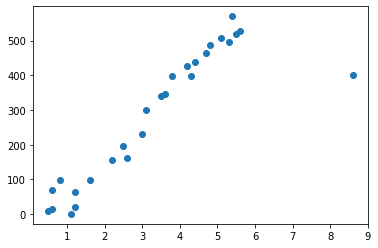

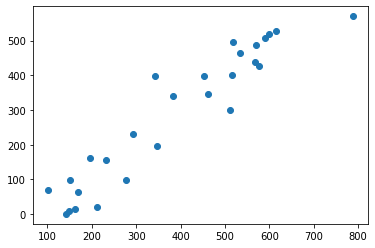

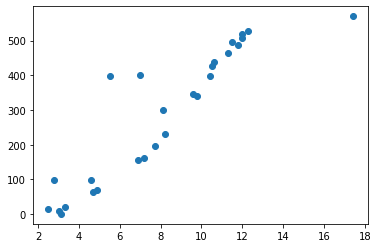

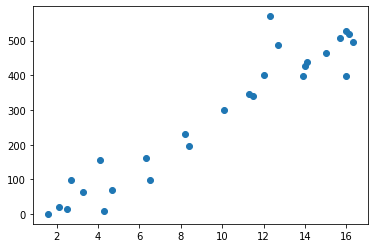

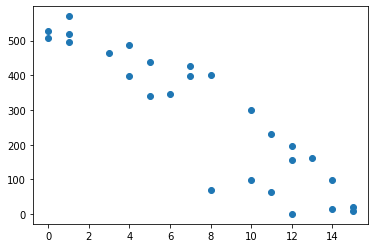

In [51]:
plt.figure()
plt.scatter(df.X2, df.X1)
plt.figure()
plt.scatter(df.X3, df.X1)
plt.figure()
plt.scatter(df.X4, df.X1)
plt.figure()
plt.scatter(df.X5, df.X1)
plt.figure()
plt.scatter(df.X6, df.X1)


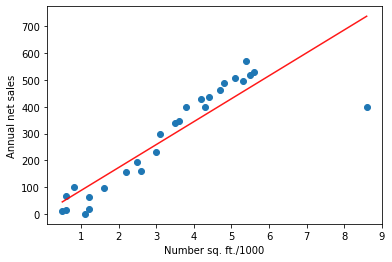

In [69]:
X_prime = np.linspace(df.X2.min(), df.X2.max(), 10)
X_prime = sm.add_constant(X_prime) # Add a constant as we did before

# Now we calculate the predicted values
y_hat = lr_model_X2.predict(X_prime)
plt.scatter(df.X2, X1) # Plot the raw data
plt.xlabel('Number sq. ft./1000')
plt.ylabel('Annual net sales')
# Add the regression line, colored in red
plt.plot(X_prime[:, 1], y_hat, 'red', alpha=0.9)

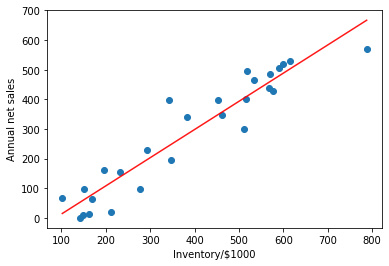

In [70]:
X_prime = np.linspace(df.X3.min(), df.X3.max(), 100)
X_prime = sm.add_constant(X_prime) # Add a constant as we did before

# Now we calculate the predicted values
y_hat = lr_model_X3.predict(X_prime)
plt.scatter(df.X3, X1) # Plot the raw data
plt.xlabel('Inventory/$1000')
plt.ylabel('Annual net sales')
# Add the regression line, colored in red
plt.plot(X_prime[:, 1], y_hat, 'red', alpha=0.9)

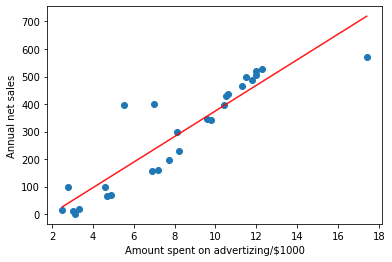

In [71]:
X_prime = np.linspace(df.X4.min(), df.X4.max(), 10)
X_prime = sm.add_constant(X_prime) # Add a constant as we did before

# Now we calculate the predicted values
y_hat = lr_model_X4.predict(X_prime)
plt.scatter(df.X4, X1) # Plot the raw data
plt.xlabel('Amount spent on advertizing/$1000')
plt.ylabel('Annual net sales')
# Add the regression line, colored in red
plt.plot(X_prime[:, 1], y_hat, 'red', alpha=0.9)

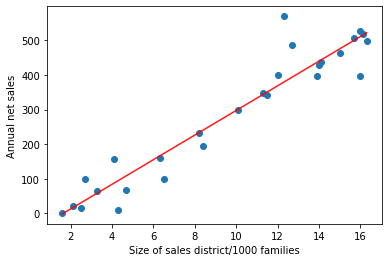

In [72]:
X_prime = np.linspace(df.X5.min(), df.X5.max(), 10)
X_prime = sm.add_constant(X_prime) # Add a constant as we did before

# Now we calculate the predicted values
y_hat = lr_model_X5.predict(X_prime)
plt.scatter(df.X5, X1) # Plot the raw data
plt.xlabel('Size of sales district/1000 families')
plt.ylabel('Annual net sales')
# Add the regression line, colored in red
plt.plot(X_prime[:, 1], y_hat, 'red', alpha=0.9)

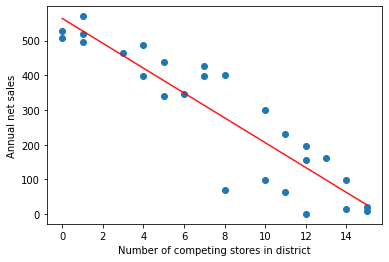

In [74]:
X_prime = np.linspace(df.X6.min(), df.X6.max(), num=50)
X_prime = sm.add_constant(X_prime)

y_hat = lr_model_X6.predict(X_prime)
plt.scatter(df.X6, X1) # Plot the raw data
plt.xlabel('Number of competing stores in district')
plt.ylabel('Annual net sales')
# Add the regression line, colored in red
plt.plot(X_prime[:, 1], y_hat, 'red', alpha=0.9)

In [77]:
from mpl_toolkits.mplot3d import Axes3D

X = df[['X4','X6']]
Y = df['X1']

X = sm.add_constant(X)

lr_model = sm.OLS(Y, X).fit()

print(lr_model.summary())


                            OLS Regression Results                            
Dep. Variable:                     X1   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     115.2
Date:                Mon, 10 May 2021   Prob (F-statistic):           4.95e-13
Time:                        14:01:22   Log-Likelihood:                -147.89
No. Observations:                  27   AIC:                             301.8
Df Residuals:                      24   BIC:                             305.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        228.7404     80.592      2.838      0.0

Text(0.5, 0, 'Annual net sales')

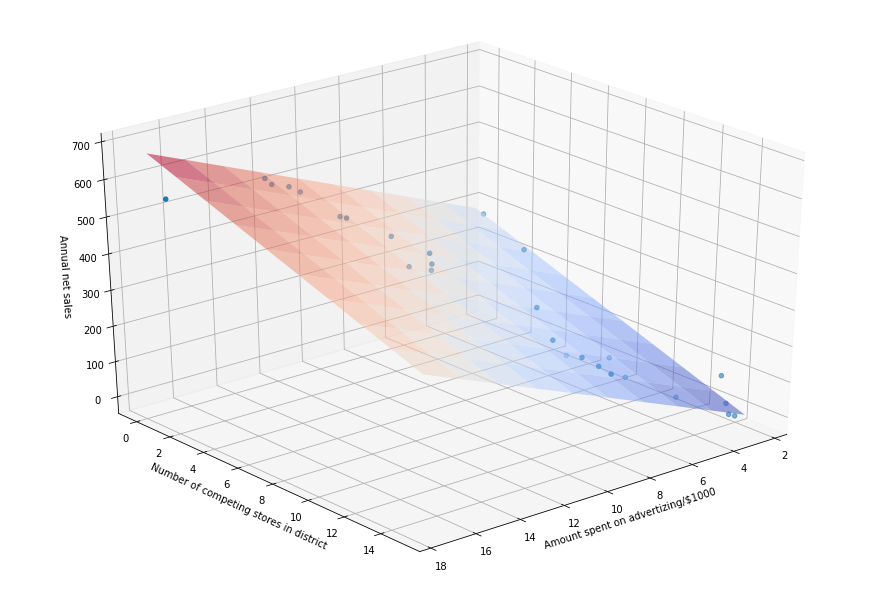

In [109]:
X_AX, Y_AX = np.meshgrid(np.linspace(df.X4.min(), df.X4.max(), 10),  np.linspace(df.X6.min(), df.X6.max(), 10) )

# X_AX 
# lr_model.params[2]
Z_AX = lr_model.params[0] + X_AX*lr_model.params[1] + Y_AX*lr_model.params[2]

fig = plt.figure(figsize=(12, 8)) # figsize refers to width and height of the figure
ax = Axes3D(fig, azim=50)

ax.plot_surface(X_AX, Y_AX, Z_AX, cmap=plt.cm.coolwarm, alpha=0.5, linewidth=0)

ax.scatter(df.X4, df.X6, df.X1)

ax.set_xlabel('Amount spent on advertizing/$1000')
ax.set_ylabel('Number of competing stores in district')
ax.set_zlabel('Annual net sales')

